In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from glob import glob
from tqdm import tqdm_notebook as tqdm
from sklearn.manifold import TSNE
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 12)

In [23]:
base_path = '/home/srivathsa/projects/studies/gad/mmt_seg/tsne/mmt_4/test/0123'
cases = sorted([f.split('/')[-1] for f in glob('{}/*'.format(base_path))])
num_encs = 4
cons = {0: 't1', 1: 't1ce', 2: 't2', 3: 'fl'}
fpath_enc = '{base_path}/{cnum}/090_enc_out_{e_idx}.npy'

mcon_enc_dict = []

all_vecs = {
    0: [],
    1: [],
    2: [],
    3: []
}

for cnum in tqdm(cases, total=len(cases)):
    for e_idx in np.arange(num_encs):
        enc_npy = np.load(fpath_enc.format(base_path=base_path, cnum=cnum, e_idx=e_idx))[0]
        for cidx, cstr in cons.items():
            enc_vec = enc_npy[cidx].reshape(-1)
            all_vecs[e_idx].append(enc_vec)
            mcon_enc_dict.append({
                'case': cnum,
                'con': cstr,
                'con_idx': cidx,
                'enc_level': e_idx,
                'embed_vec': enc_vec,
                'vec_idx': len(all_vecs[e_idx]) - 1
            })
            
for idx in np.arange(num_encs):
    all_vecs[idx] = np.array(all_vecs[idx])

<ipython-input-23-2dab3947c2e7>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cnum in tqdm(cases, total=len(cases)):


  0%|          | 0/63 [00:00<?, ?it/s]

In [47]:
all_projs = {
    0: [], 1: [], 2: [], 3: []
}
for e_idx in np.arange(num_encs):
    tsne = TSNE(n_components=2, init="random", random_state=0, n_iter=500, perplexity=150)
    all_projs[e_idx] = tsne.fit_transform(all_vecs[e_idx])

In [48]:
for mcon_row in mcon_enc_dict:
    proj_pt = all_projs[mcon_row['enc_level']][mcon_row['vec_idx']]
    mcon_row['X'] = proj_pt[0]
    mcon_row['Y'] = proj_pt[1]

<AxesSubplot:xlabel='X', ylabel='Y'>

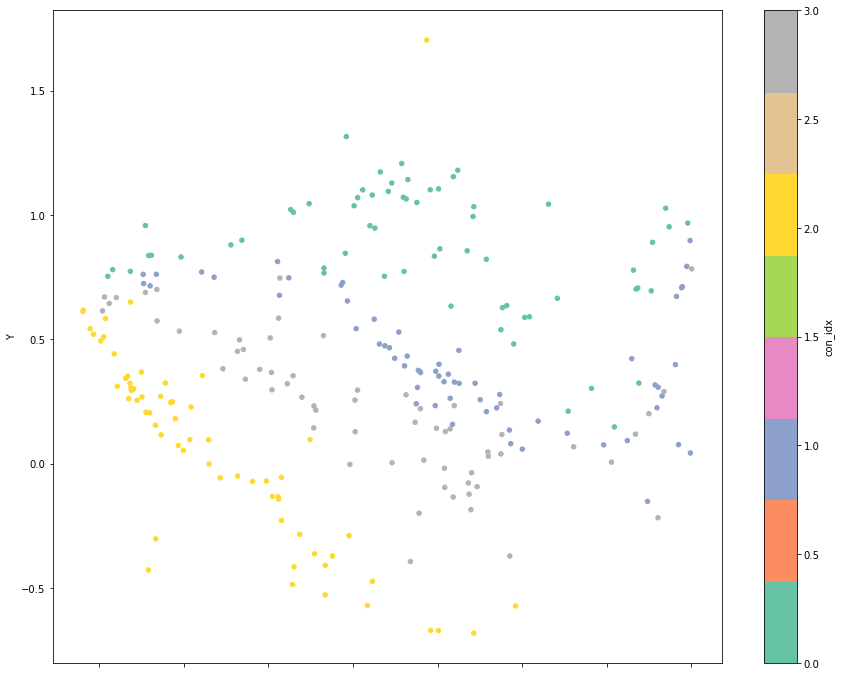

In [52]:
df_mcon_encs = pd.DataFrame(mcon_enc_dict)
df_mcon_encs = df_mcon_encs.drop(columns=['embed_vec'])

df_enc0 = df_mcon_encs[df_mcon_encs['enc_level'] == 0]
df_enc0.plot.scatter(x='X', y='Y', c='con_idx', cmap='Set2')

In [35]:
all_vecs[3].shape

(252, 184320)